In [1]:
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

In [4]:
X_train_full = (train[[str(i) for i in range(784)]]/255.).values.reshape(-1,28,28,1)
y_train_full = to_categorical(train['digit'].values)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.25
)

In [7]:
batch_size = 32
train_generator = datagen.flow(
    X_train_full, y_train_full,
    batch_size=batch_size,
    subset='training'
)
validation_generator = datagen.flow(
    X_train_full, y_train_full,
    batch_size=batch_size,
    subset='validation'
)

In [ ]:
X_train = X_train_full[:1536]
y_train = y_train_full[:1536]
X_val = X_train_full[1536:]
y_val = y_train_full[1536:]

In [14]:
input_ = layers.Input(shape=(28,28,1))
conv_1 = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(input_)
pool_1 = layers.MaxPooling2D(pool_size=(2,2))(conv_1)
drop_1 = layers.Dropout(0.25)(pool_1)

conv_2 = layers.Conv2D(64,kernel_size=3, padding="same", activation="relu")(drop_1)
pool_2 = layers.MaxPooling2D(pool_size=(2,2))(conv_2)
drop_2 = layers.Dropout(0.25)(pool_2)

conv_3 = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(drop_2)
pool_3 = layers.MaxPooling2D(pool_size=(2,2))(conv_3)
drop_3 = layers.Dropout(0.25)(pool_3)

x = layers.Flatten()(drop_3)
#dense = layers.Dense(512, activation="relu")(x)
drop_4 = layers.Dropout(0.25)(x)
output= layers.Dense(10, activation = "softmax")(drop_4)

base_model = models.Model(inputs=[input_], outputs=[output])

In [9]:
base_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0     

In [15]:
input_2 = layers.Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(input_2)
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(32, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Conv2D(64, kernel_size=3, padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)
x = layers.Dropout(0.5)(x)

x = layers.Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
output_2 = layers.Dense(10, activation = "softmax")(x)

base_model2 = models.Model(inputs=[input_2], outputs=[output_2])

In [16]:
model = base_model2
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [17]:
epochs = 200
history = model.fit_generator(
    train_generator, 
    epochs = epochs,
    validation_data = validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 48 steps, validate for 16 steps
Epoch 1/200
48/48 [==============================] - 1s 31ms/step - loss: 2.2997 - accuracy: 0.1243 - val_loss: 2.2780 - val_accuracy: 0.1621
Epoch 2/200
48/48 [==============================] - 1s 10ms/step - loss: 2.1830 - accuracy: 0.2044 - val_loss: 2.0385 - val_accuracy: 0.2676
Epoch 3/200
48/48 [==============================] - 1s 11ms/step - loss: 1.9824 - accuracy: 0.3027 - val_loss: 1.9288 - val_accuracy: 0.3008
Epoch 4/200
48/48 [==============================] - 1s 11ms/step - loss: 1.8447 - accuracy: 0.3483 - val_loss: 1.9240 - val_accuracy: 0.3105
Epoch 5/200
48/48 [==============================] - 1s 11ms/step - loss: 1.7464 - accuracy: 0.4108 - val_loss: 1.6902 - val_accuracy: 0.4160
Epoch 6/200
48/48 [==============================] - 1s 11ms/step - loss: 1.7061 - accuracy: 0.3978 - val_loss: 1.5674 - val_accuracy: 0.4707
Epoch 7/200
48/48 [==============================] - 1s 

Epoch 57/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4635 - accuracy: 0.8470 - val_loss: 0.7015 - val_accuracy: 0.7734
Epoch 58/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4734 - accuracy: 0.8327 - val_loss: 0.6024 - val_accuracy: 0.7891
Epoch 59/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4751 - accuracy: 0.8379 - val_loss: 0.6167 - val_accuracy: 0.8008
Epoch 60/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4613 - accuracy: 0.8340 - val_loss: 0.6076 - val_accuracy: 0.7754
Epoch 61/200
48/48 [==============================] - 1s 11ms/step - loss: 0.3995 - accuracy: 0.8613 - val_loss: 0.6295 - val_accuracy: 0.8105
Epoch 62/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4398 - accuracy: 0.8503 - val_loss: 0.6451 - val_accuracy: 0.7852
Epoch 63/200
48/48 [==============================] - 1s 11ms/step - loss: 0.4161 - accuracy: 0.8535 - val_loss: 0.7314 - val_accuracy: 0.7422

48/48 [==============================] - 0s 10ms/step - loss: 0.3238 - accuracy: 0.8906 - val_loss: 0.6026 - val_accuracy: 0.8203
Epoch 115/200
48/48 [==============================] - 1s 11ms/step - loss: 0.3006 - accuracy: 0.8861 - val_loss: 0.6189 - val_accuracy: 0.7969
Epoch 116/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2836 - accuracy: 0.9023 - val_loss: 0.5915 - val_accuracy: 0.8008
Epoch 117/200
48/48 [==============================] - 1s 11ms/step - loss: 0.3225 - accuracy: 0.8939 - val_loss: 0.6255 - val_accuracy: 0.8047
Epoch 118/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2982 - accuracy: 0.8971 - val_loss: 0.6765 - val_accuracy: 0.8086
Epoch 119/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2970 - accuracy: 0.8958 - val_loss: 0.6337 - val_accuracy: 0.7969
Epoch 120/200
48/48 [==============================] - 1s 11ms/step - loss: 0.3208 - accuracy: 0.8893 - val_loss: 0.5864 - val_accuracy: 0.8086
Epoch 

Epoch 171/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2313 - accuracy: 0.9271 - val_loss: 0.6054 - val_accuracy: 0.8320
Epoch 172/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2395 - accuracy: 0.9134 - val_loss: 0.6087 - val_accuracy: 0.8203
Epoch 173/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2590 - accuracy: 0.9108 - val_loss: 0.6862 - val_accuracy: 0.7930
Epoch 174/200
48/48 [==============================] - 0s 10ms/step - loss: 0.2311 - accuracy: 0.9212 - val_loss: 0.6622 - val_accuracy: 0.8105
Epoch 175/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2286 - accuracy: 0.9277 - val_loss: 0.6284 - val_accuracy: 0.8184
Epoch 176/200
48/48 [==============================] - 1s 10ms/step - loss: 0.2302 - accuracy: 0.9225 - val_loss: 0.7021 - val_accuracy: 0.8281
Epoch 177/200
48/48 [==============================] - 1s 11ms/step - loss: 0.2907 - accuracy: 0.9102 - val_loss: 0.6994 - val_accuracy:

In [18]:
print(
    f"Train accuracy={max(history.history['accuracy']):.5f}, " +
    f"Validation accuracy={max(history.history['val_accuracy']):.5f}"
)

Train accuracy=0.93359, Validation accuracy=0.83398


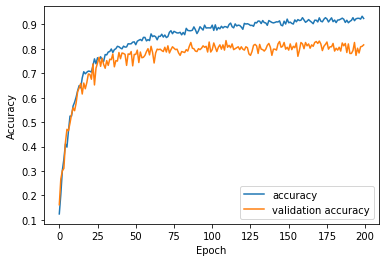

In [19]:
plt.figure()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
X_test = (test[[str(i) for i in range(784)]] / 255.).values.reshape(-1, 28, 28, 1)
results = model.predict(X_test)

In [50]:
results[0]

array([2.58340350e-07, 3.38235447e-11, 3.83989629e-03, 1.05029285e-05,
       3.21989842e-06, 7.59562340e-07, 9.85656977e-01, 2.77252415e-10,
       1.04884114e-02, 7.25146165e-10], dtype=float32)

In [51]:
results.shape

(20480, 10)

In [52]:
import numpy as np
results = np.argmax(results, axis=1)

In [53]:
import datetime
nowDate = datetime.datetime.now()
cur = nowDate.strftime("%m%d%H%M")
filename = 'submission' + cur + '.csv'
submission.digit = results
submission.to_csv(filename, index=False)